# Clustering

In [129]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import umap.umap_ as umap
from sklearn.tree import DecisionTreeClassifier

# Load Preprocessed Data from previous notebook

In [130]:
df = pd.read_csv('./preprocessed_numeric.csv')
df_cat = pd.read_csv('./preprocessed_categorical.csv')
df.drop(["Dropout", "Income"], axis=1, inplace=True)

# Feature Scaling

In [131]:
def clusterize(model):
    clusters = model.fit_predict(scaled_df)

    unscaled_numeric_features = pd.DataFrame(scaler.inverse_transform(scaled_df))
    unscaled_numeric_features.columns = df.columns
    df_clusters = pd.concat([unscaled_numeric_features, pd.Series(clusters, name='labels', index=unscaled_numeric_features.index)], axis=1)
    
    s_score = silhouette_score(scaled_df, model.labels_)
    print(f"Silhouette Score: {s_score:.3f}")
    
    return df_clusters

In [132]:
# two_dim = TSNE(random_state=42).fit_transform(df)

In [133]:
def plot_clusters_tsne(dataframe):
    # t-SNE visualization
    pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=dataframe['labels'], colormap='tab10', figsize=(10,10))
    plt.show()

In [134]:
def plot_clusters_umap(dataframe):
    umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(df)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dataframe['labels'], cmap='viridis')
    plt.title('UMAP Visualization of Clusters')
    plt.show()

In [135]:
def assess_feature_importance(dataframe):
    # Preparing the data
    X = dataframe.drop('labels', axis=1)
    y = dataframe['labels']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the decision tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))
    return pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [136]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

<Axes: >

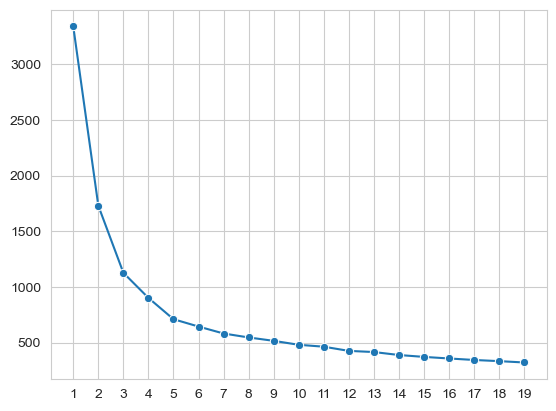

In [137]:
clusters_range = range(1, 20)
inertia = []
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plot = sns.lineplot(x=clusters_range, y=inertia, marker='o')
plot.set_xticks(clusters_range)
plot

In [138]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans_4_clustered_df = clusterize(kmeans)
# plot_clusters_tsne(kmeans_4_clustered_df)
kmeans_4_clustered_df.groupby('labels').mean().T
# assess_feature_importance(kmeans_4_clustered_df)
# kmeans_4_clustered_df.groupby('labels').size()

Silhouette Score: 0.544


labels,0,1,2,3,4
EnrollmentDurationInDays,172.828180,271.909683,420.364286,1175.992079,217.719777
LastPeriodDurationInDays,181.476094,365.344685,368.384416,223.768317,182.129248
DaysWithoutFrequency,76.405812,72.556707,112.999351,165.952475,64.659610
LifetimeValue,201.220840,204.591685,401.983513,587.535663,586.450869
NumberOfFrequencies,35.362899,34.001481,31.783117,105.141584,45.940390
AttendedClasses,1.537422,1.214688,26.887662,8.133663,40.070752
AllowedWeeklyVisitsBySLA,6.988005,6.986675,2.216883,6.896040,2.349304
AllowedNumberOfVisitsBySLA,44.815124,59.829908,20.609675,50.716396,18.114228
RealNumberOfVisits,5.957594,5.663311,3.067532,5.936634,4.043454


<Axes: xlabel='labels'>

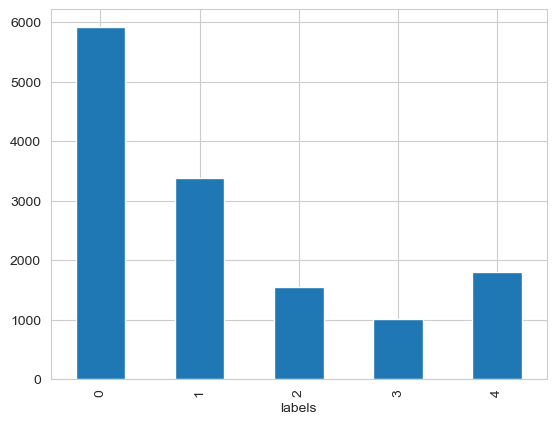

In [139]:
# bar plot size of clusters
kmeans_4_clustered_df.groupby('labels').size().plot(kind='bar')

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


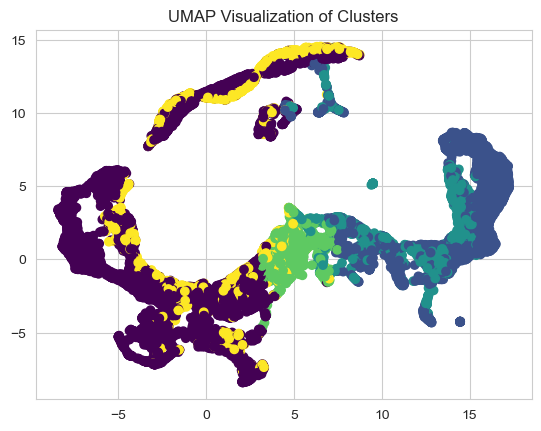

In [140]:
plot_clusters_umap(kmeans_4_clustered_df)

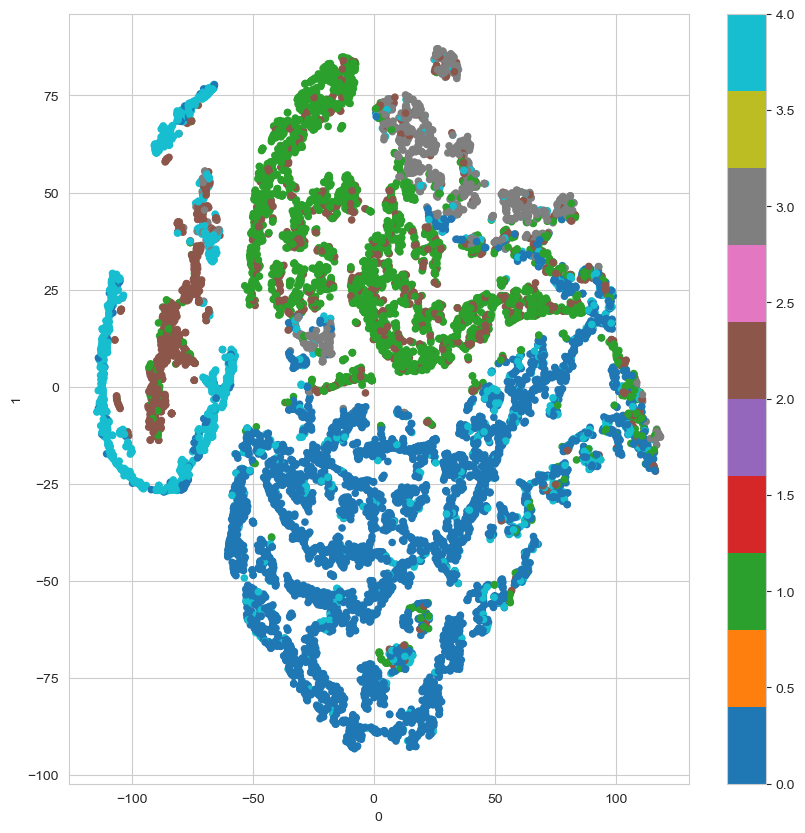

In [141]:
plot_clusters_tsne(kmeans_4_clustered_df)

In [142]:
cat_df_clusters = pd.concat([df_cat, kmeans_4_clustered_df['labels']], axis=1)
cat_df_clusters.groupby('labels').sum()

,Gender_Male,Gender_Female,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout
labels,,,,,,,,,,,,
0,2286,3633,210,47.0,731.0,4714.0,89.0,11.0,692.0,173.0,2.0,4746
1,1403,1974,181,32.0,630.0,2260.0,57.0,17.0,570.0,47.0,0.0,3230
2,595,945,13,4.0,932.0,152.0,242.0,210.0,42.0,54.0,13.0,1460
3,465,545,253,8.0,290.0,751.0,46.0,9.0,139.0,56.0,0.0,1010
4,759,1036,12,12.0,1275.0,187.0,298.0,75.0,60.0,40.0,10.0,904


# DBSCAN

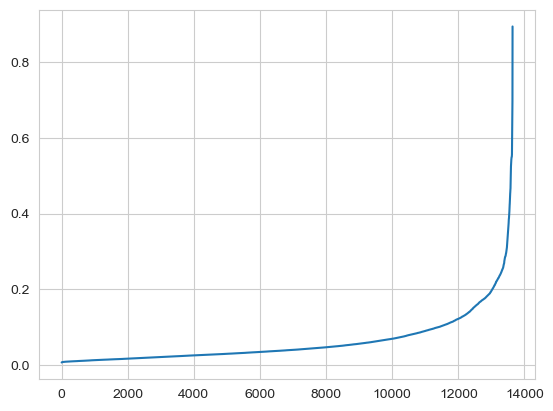

In [143]:
from sklearn.neighbors import NearestNeighbors

dbscan_df = scaled_df.copy()

# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=21)
neigh.fit(dbscan_df)
distances, _ = neigh.kneighbors(dbscan_df)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [144]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.18, min_samples=20, n_jobs=4)
df_dbscan = clusterize(dbscan)
df_dbscan.groupby('labels').mean().T

Silhouette Score: 0.369


labels,-1,0,1,2
EnrollmentDurationInDays,767.005319,389.811675,260.983618,326.648695
LastPeriodDurationInDays,299.284574,364.254343,181.600819,364.308456
DaysWithoutFrequency,386.377660,85.100069,74.917008,75.274404
LifetimeValue,889.225532,383.525865,297.035370,225.552511
NumberOfFrequencies,155.132979,30.034051,39.629848,37.225312
AttendedClasses,55.938830,25.418346,8.850518,1.039728
AllowedWeeklyVisitsBySLA,4.765957,2.224461,6.012888,6.992054
AllowedNumberOfVisitsBySLA,53.620160,19.544705,39.470622,58.686921
RealNumberOfVisits,9.683511,3.086866,5.366418,5.599035


/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


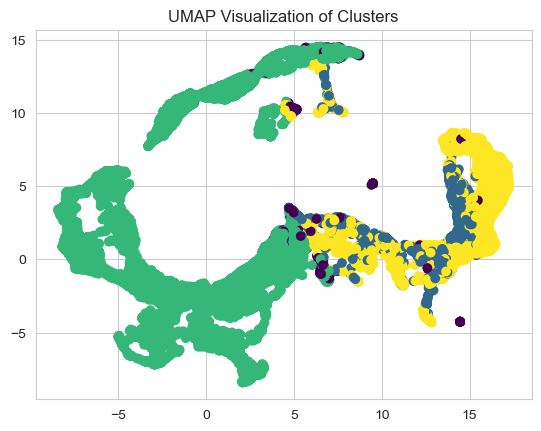

In [145]:
plot_clusters_umap(df_dbscan)

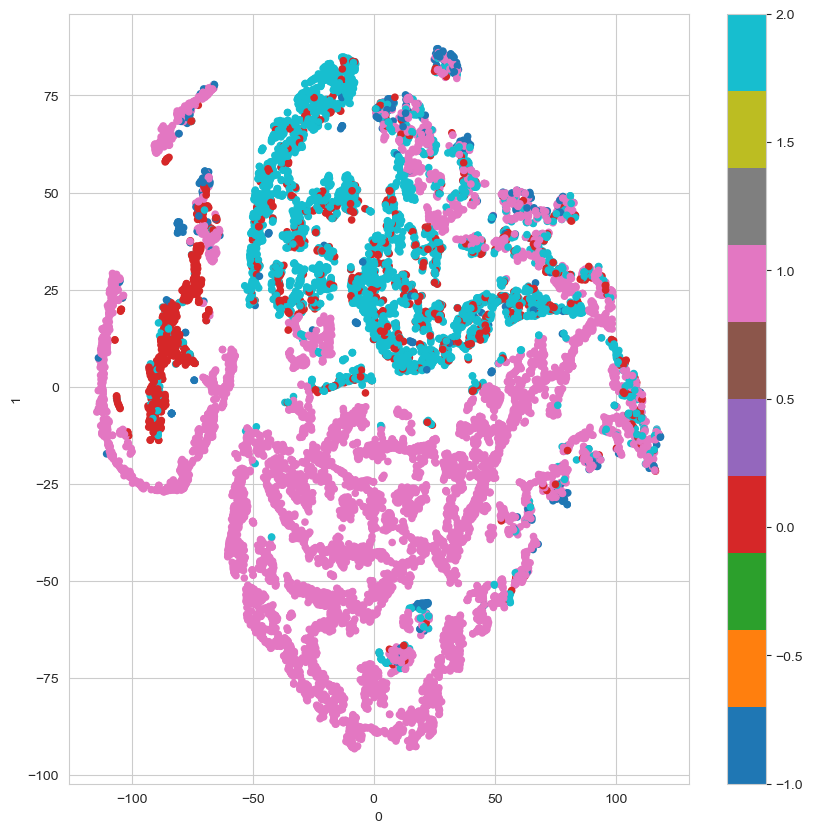

In [146]:
plot_clusters_tsne(df_dbscan)